# Importing Library

In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
import re
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import distance
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import spacy 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
import mlflow
import os

### Importing data set

In [2]:
data = pd.read_csv('train.csv')
data = data.head(200000)

In [3]:
data.shape

(200000, 6)

In [4]:
data.head(5)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

- we have 6 columns with columns name : ('id','qid1','qid2','question1','question2','is_duplicate')

In [5]:
print('shape of dataset',data.shape)

shape of dataset (200000, 6)


## Checking the null value

In [6]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

- we have 3 null value , 1 null in question1 and 2 null value in question2

In [7]:
## showing the null value rows
## droping null data rows or fillna value

def null_data_pre(data,flag):
    
    if 1<=data.isnull().sum().sum():
        print(data.isnull().sum())
        print('-'*50)
        nan_row = data[data.isnull().any(1)]
        print(nan_row)
        print('-'*50)
        if flag == 'del':
            file = data.dropna()
        else:
            file = data.fillna(flag)
        return file
    else:
        print('data_set has no null value')

In [8]:
### checking the null value in data set and filling with ' ' 

In [9]:
null_data_pre(data,flag = ' ')

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64
--------------------------------------------------
            id    qid1    qid2                       question1 question2  \
105780  105780  174363  174364  How can I develop android app?       NaN   

        is_duplicate  
105780             0  
--------------------------------------------------


id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
199995  199995  250170   43219   
199996  199996  281111  301626   
199997  199997  301627  301628   
199998  199998  203260  211126   
199999  199999  301629  301630   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
199995     Why was the Battle of Vimy Ridge so important?   
199996       Which of these TV shows should I watch next?   
199997                           Should I change my name?   
199998  Should I buy the new MacBook 2016 or one from ...   
199999          What is your review of Love (2011 movie)?   

                                                question2  is_duplicate  
0       What is the step by step guide to invest in sh...             0  
1       What would happen if the Indian government sto...             0  
2       How can Internet speed be increased by hacking...             0  
3       Find the remainder when [math]23^{24}[/math] i...             0  
4                 Which fish would survive in salt water?             0  
...                                                   ...           ...  
199995  What is the significance of the Battle of Vimy...             1  
199996  What are some thriller shows I should watch next?             0  
199997             Should I legally change my first name?             0  
199998  Should I buy the new MacBook pro 2016 or the M...             1  
199999    What is your review of Love Birds (2011 movie)?             0  

[200000 rows x 6 columns]

### Checking if dataset is balanced or imbalanced

In [10]:
print('-->> Question pairs are not Similar (is_duplicate = 0):\n     {}%'.format(100 - round(data['is_duplicate'].mean()*100, 2)))
print('-->> Question pairs are Similar (is_duplicate = 1):\n     {}%'.format(round(data['is_duplicate'].mean()*100, 2)))


-->> Question pairs are not Similar (is_duplicate = 0):
     62.76%
-->> Question pairs are Similar (is_duplicate = 1):
     37.24%


In [11]:
# duplicate rows
data.duplicated().sum()

0

 - we don't have duplicate pair of data in  dataset

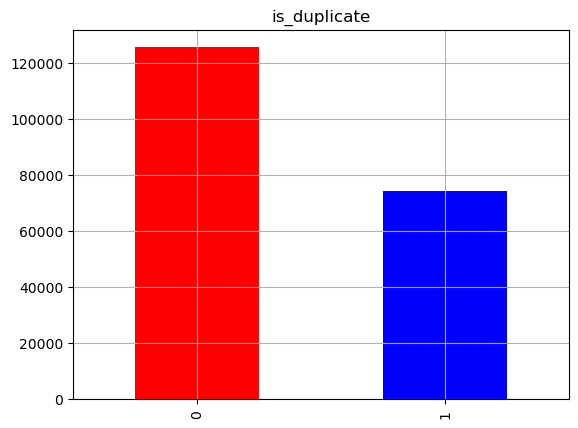

In [12]:
# creating bar plot to check the data distribution 
data.is_duplicate.value_counts().plot.bar(color=['red','blue'])
plt.title('is_duplicate')
plt.grid()

- non repeated question   : 255027
- repeated question : 149263

### number of unique Questions

In [13]:
qids = pd.Series(data['qid1'].tolist()+data['qid2'].tolist())
unique_qs = len(np.unique(qids))

In [14]:
unique_qs = len(np.unique(qids))
repeated = np.sum(qids.value_counts()>1)
max_repeated = max(qids.value_counts())
print('Number of Unique questions {} \nNo of repeated questions: {} \nMax repeated:{}'.format(unique_qs,repeated,max_repeated))

Number of Unique questions 301630 
No of repeated questions: 47905 
Max repeated:68


In [15]:
# showing how many question repeted how many time
qids.value_counts() 

2559      68
4044      57
30782     54
17978     43
2561      37
          ..
224130     1
224131     1
224133     1
224135     1
301630     1
Length: 301630, dtype: int64

Text(0, 0.5, 'Number of question')

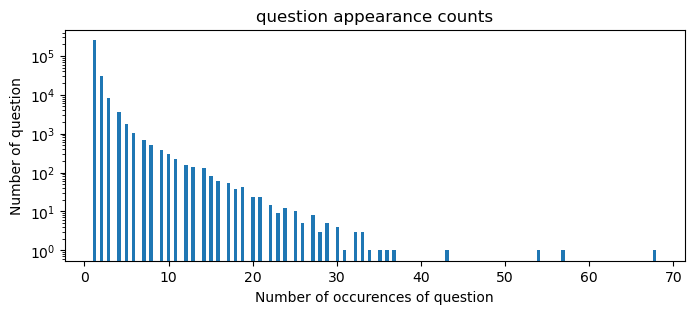

In [16]:
# Number of occurences of each Question
plt.figure(figsize=(8,3))
plt.hist(qids.value_counts(),bins=160)
plt.yscale('log',nonposy='clip')
plt.title('question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of question')


- in hist plot we are getting how many question repeated most of the time

Text(0.5, 1.0, 'unique vs repeated')

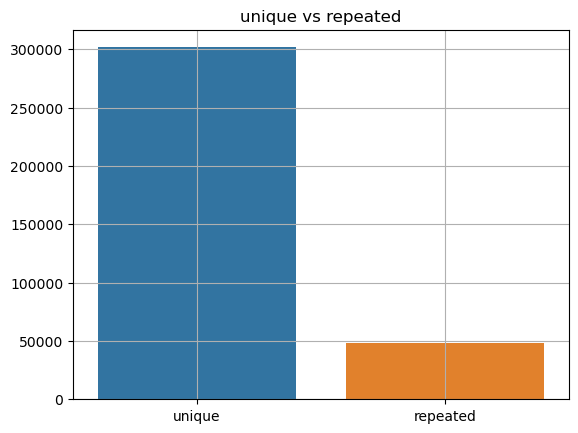

In [17]:
# showing bar plot to check the unique and repeated value 
sns.barplot(y=[unique_qs,repeated],x=['unique','repeated'])
plt.grid()
plt.title('unique vs repeated')

- Number of Unique questions 537933 
- No of repeated questions: 111780 

In [18]:
# checking whether there are any repeated pair of questions
pair_duplicates = data[['qid1','qid2','question1','question2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
pair_duplicates.head()

qid1    qid2  question1  question2  is_duplicate
0     1       2          1          1             1
1     3       4          1          1             1
2     3  282170          1          1             1
3     4   32881          1          1             1
4     5       6          1          1             1

- we don't have any repeated pair of question

## Text preprocessing

In [19]:
Stopword = stopwords.words('english')
Stopword.remove('no')
Stopword.remove('not')
stopwords= set(Stopword)

In [20]:
# funation for text preprocessing (Expanding contractions )
def preprocess_text(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub(r"http\S+", "", x)
    x = re.sub('\W', ' ', x) 
    bfs = BeautifulSoup(x) # removing html tage form the text
    x = bfs.get_text()
    x = x.strip()
    return x

## Word clould

In [21]:
df_duplicate = data[data['is_duplicate'] == 1]
dfp_nonduplicate = data[data['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

Number of data points in class 1 (duplicate pairs) : 148950
Number of data points in class 0 (non duplicate pairs) : 251050


Word Cloud for Duplicate Question pairs


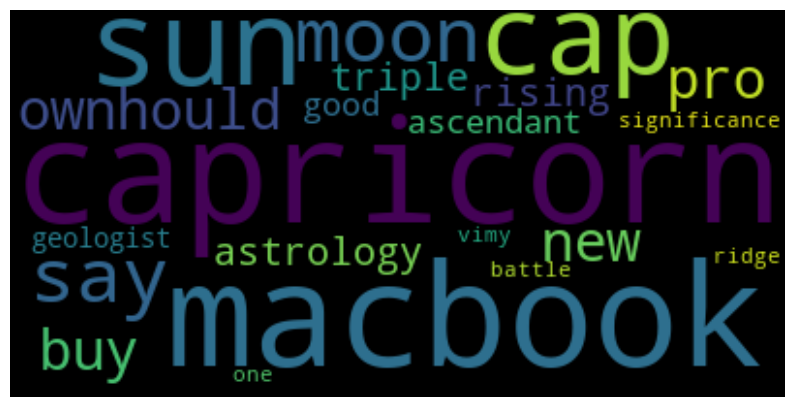

In [22]:
textp_w = preprocess_text(p)

stopwords 
plt.figure(figsize=(10,8))
wc = WordCloud(background_color="black", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non Duplicate Question pairs


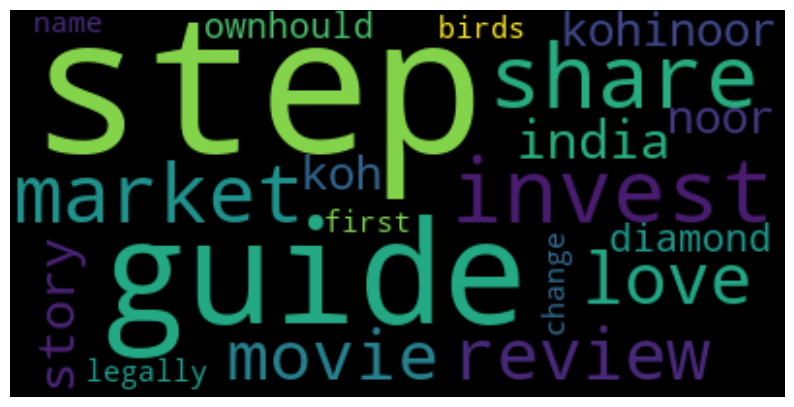

In [23]:
textn_w = preprocess_text(n)
plt.figure(figsize=(10,8))
stopwords 
wc = WordCloud(background_color="black", max_words=len(textn_w), stopwords=stopwords)
wc.generate(textn_w)
print ("Word Cloud for non Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### performing data cleaning and stemming(removing punchuation marks and Expanding contractions )

In [24]:
# function for performing data cleaning (removing stop_words, lower the text and perfome stemming or lemmitaization )
def data_cleaning(data):
    data['question1'] = data.question1.apply(preprocess_text)
    data['question2'] = data.question2.apply(preprocess_text)
    return data

In [25]:
clean_data = data_cleaning(data)

In [29]:
clean_data.head(10)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve it   
4   4     9    10  which one dissolve in water quikly sugar  salt...   
5   5    11    12  astrology  i am a capricorn sun cap moon and c...   
6   6    13    14                                 should i buy tiago   
7   7    15    16                      how can i be a good geologist   
8   8    17    18                     when do you use シ instead of し   
9   9    19    20  motorola  company   can i hack my charter moto...   

                                           question2  is_duplicate  
0  what is the step by step guide to invest in sh...             0  
1  what would happen if the indian government sto...             0  
2  how can internet speed be increased by hacking...             0  
3  find the remainder when  math 23  24   math  i...             0  
4             which fish would survive in salt water             0  
5  i am a triple capricorn  sun  moon and ascenda...             1  
6  what keeps childern active and far from phone ...             0  
7           what should i do to be a great geologist             1  
8                when do you use     instead of  and             0  
9   how do i hack motorola dcx3400 for free internet             0

- remove all type of puchuation markes and html tagges for dataset 

### Removing Stopword and performing stemming or lemmatizer

In [33]:
# function removing stopword and stemming or lemmatizer
def removing_stopword(data, flag):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    data = data.split()
    if flag == 'stem':
        x = [stemmer.stem(word) for word in data if word not in stopwords]
        x = ' '.join(x)
    elif flag =='lemm':
        x = [lemmatizer.lemmatize(word) for word in data if word not in stopwords]
        x = ' '.join(x)
    x = x.strip()
    return x

- STEMMING => natural -> natur
- LEMMITIZATION => natural -> nature

In [34]:
# performing stemming in qusetion1 and question2 
stem_data = pd.DataFrame()
stem_data['stem_question1'] = clean_data.question1.apply(removing_stopword,flag = 'stem')
stem_data['stem_question2'] = clean_data.question2.apply(removing_stopword,flag = 'stem')
stem_data.head(5)

stem_question1  \
0           step step guid invest share market india   
1                    stori kohinoor koh noor diamond   
2             increas speed internet connect use vpn   
3                                   mental lone solv   
4  one dissolv water quikli sugar salt methan car...   

                                      stem_question2  
0                 step step guid invest share market  
1  would happen indian govern stole kohinoor koh ...  
2                     internet speed increas hack dn  
3           find remaind math 23 24 math divid 24 23  
4                       fish would surviv salt water

In [35]:
#comparision of Raw data and Cleaned data 
compair_data = pd.concat([data[['question1','question2']],stem_data],axis=1)
compair_data.head()

question1  \
0  what is the step by step guide to invest in sh...   
1  what is the story of kohinoor  koh i noor  dia...   
2  how can i increase the speed of my internet co...   
3  why am i mentally very lonely  how can i solve it   
4  which one dissolve in water quikly sugar  salt...   

                                           question2  \
0  what is the step by step guide to invest in sh...   
1  what would happen if the indian government sto...   
2  how can internet speed be increased by hacking...   
3  find the remainder when  math 23  24   math  i...   
4             which fish would survive in salt water   

                                      stem_question1  \
0           step step guid invest share market india   
1                    stori kohinoor koh noor diamond   
2             increas speed internet connect use vpn   
3                                   mental lone solv   
4  one dissolv water quikli sugar salt methan car...   

                                      stem_question2  
0                 step step guid invest share market  
1  would happen indian govern stole kohinoor koh ...  
2                     internet speed increas hack dn  
3           find remaind math 23 24 math divid 24 23  
4                       fish would surviv salt water

- we can see the question comparison 

## Pos tagging

In [36]:
# POS Taggging
def Pos_tagging(data):
   
    # Word tokenizers is used to find the words and punctuation in a string
    wordsList = nltk.word_tokenize(data)
    #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
    return tagged

In [37]:
%%time
# performing pos tagging and coverting question to part of speach
stem_data['pos_tag_que1'] = compair_data.question1.apply(Pos_tagging)
stem_data['pos_tag_que2'] = compair_data.question2.apply(Pos_tagging)

Wall time: 14min 31s


In [38]:
stem_data.head()

stem_question1  \
0           step step guid invest share market india   
1                    stori kohinoor koh noor diamond   
2             increas speed internet connect use vpn   
3                                   mental lone solv   
4  one dissolv water quikli sugar salt methan car...   

                                      stem_question2  \
0                 step step guid invest share market   
1  would happen indian govern stole kohinoor koh ...   
2                     internet speed increas hack dn   
3           find remaind math 23 24 math divid 24 23   
4                       fish would surviv salt water   

                                        pos_tag_que1  \
0  [(what, WP), (is, VBZ), (the, DT), (step, NN),...   
1  [(what, WP), (is, VBZ), (the, DT), (story, NN)...   
2  [(how, WRB), (can, MD), (i, VB), (increase, VB...   
3  [(why, WRB), (am, VBP), (i, JJ), (mentally, RB...   
4  [(which, WDT), (one, CD), (dissolve, NN), (in,...   

                                        pos_tag_que2  
0  [(what, WP), (is, VBZ), (the, DT), (step, NN),...  
1  [(what, WP), (would, MD), (happen, VB), (if, I...  
2  [(how, WRB), (can, MD), (internet, VB), (speed...  
3  [(find, VB), (the, DT), (remainder, NN), (when...  
4  [(which, WDT), (fish, NN), (would, MD), (survi...

## Lemmetization

In [39]:
lemm_data = pd.DataFrame()
lemm_data['id']= clean_data.id
lemm_data['lemm_question1'] = clean_data.question1.apply(removing_stopword,flag = 'lemm')
lemm_data['lemm_question2'] = clean_data.question2.apply(removing_stopword,flag = 'lemm')
lemm_data.head(5)

id                                     lemm_question1  \
0   0          step step guide invest share market india   
1   1                    story kohinoor koh noor diamond   
2   2       increase speed internet connection using vpn   
3   3                              mentally lonely solve   
4   4  one dissolve water quikly sugar salt methane c...   

                                      lemm_question2  
0                step step guide invest share market  
1  would happen indian government stole kohinoor ...  
2               internet speed increased hacking dns  
3       find remainder math 23 24 math divided 24 23  
4                      fish would survive salt water

- we remove the punchuation markes and html tagges and perfoming lammetization on data_set 

In [40]:
be_data = pd.read_csv('train.csv',usecols=['id','qid1','qid2','is_duplicate'])
be_data.head(5)

id  qid1  qid2  is_duplicate
0   0     1     2             0
1   1     3     4             0
2   2     5     6             0
3   3     7     8             0
4   4     9    10             0

## Merging the lemmitize question with the 'id','qid1','qid2','is_dumplicate'

In [41]:
lemm_data = lemm_data.merge(be_data,how='left',on='id')
lemm_data.head()

id                                     lemm_question1  \
0   0          step step guide invest share market india   
1   1                    story kohinoor koh noor diamond   
2   2       increase speed internet connection using vpn   
3   3                              mentally lonely solve   
4   4  one dissolve water quikly sugar salt methane c...   

                                      lemm_question2  qid1  qid2  is_duplicate  
0                step step guide invest share market     1     2             0  
1  would happen indian government stole kohinoor ...     3     4             0  
2               internet speed increased hacking dns     5     6             0  
3       find remainder math 23 24 math divided 24 23     7     8             0  
4                      fish would survive salt water     9    10             0

# Feature Extraction

In [42]:
def doesMatch (q, match):
    q1, q2 = q['question1'], q['question2']
    q1 = str(q1).split()
    q2 = str(q2).split()
    if len(q1)>0 and len(q2)>0 and q1[match]==q2[match]:
        return 1
    else:
        return 0

In [43]:
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)


- Token: You get a token by splitting sentence a space
- Stop_Word : stop words as per NLTK.
- Word : A token that is not a stop_word

 ### Features:

- common_word : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))

- common_word_ratio : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))

- common_stop_word_ratio_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))

- common_stop_word_ratio_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))

- common_word_ratio_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))


- common_word_ratio_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))


- same_last_word : Check if Last word of both questions is equal or not
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])


- same_first_word : Check if First word of both questions is equal or not
first_word_eq = int(q1_tokens[0] == q2_tokens[0])

In [44]:
pd.options.display.max_columns=None

In [45]:
data.head()

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve it   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  
0  what is the step by step guide to invest in sh...             0  
1  what would happen if the indian government sto...             0  
2  how can internet speed be increased by hacking...             0  
3  find the remainder when  math 23  24   math  i...             0  
4             which fish would survive in salt water             0

In [46]:
# Get the common stopwords from Question pair
def common_stop_words_ratio(q,value):
    q1_tokens =str( q.question1).split()
    q2_tokens = str(q.question2).split()
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stopwords])
    q2_stops = set([word for word in q2_tokens if word in stopwords])
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    if value == 'min':
        token_features = common_stop_count / (min(len(q1_stops), len(q2_stops)) + 0.0001)
    elif value == 'max':
        token_features = common_stop_count / (max(len(q1_stops), len(q2_stops)) + 0.0001)
    return token_features

In [47]:
def feature_extract(data):
    print('feature_extraction_start.....')
    data['len_q1'] = data.question1.str.len()
    data['len_q2'] = data.question2.str.len()
    data['q1_word'] = data.question1.apply(lambda x: len(str(x).split(' ')))
    data['q2_word'] = data.question2.apply(lambda x: len(str(x).split(' ')))
    
    data['total_word'] = data['q1_word'] + data['q2_word']
    data['differ_word_num'] = abs(data['q1_word'] - data['q2_word'])
    data['same_first_word'] = data.apply(lambda x: doesMatch(x, 0) ,axis=1)
    data['same_last_word'] = data.apply(lambda x: doesMatch(x, -1) ,axis=1)
    data['total_unique_word'] = data.apply(lambda x: len(set(str(x.question1).split()).union(set(str(x.question2).split()))) ,axis=1)
    data['total_unique_word_withoutstopword_num'] = data.apply(lambda x: len(set(str(x.question1).split()).union(set(str(x.question2).split())) - set(stopwords)) ,axis=1)
    data['total_unique_word_num_ratio'] = data['total_unique_word'] / data['total_word']
    print('......')
    data['common_word'] = data.apply(lambda x: len(set(str(x.question1).split()).intersection(set(str(x.question2).split()))) ,axis=1)
    data['common_word_ratio'] = data['common_word'] / data['total_unique_word'] # word share
    data['word_share'] = data['common_word']/data['total_word']
    data['common_word_ratio_min'] = data['common_word'] / data.apply(lambda x: min(len(set(str(x.question1).split())), len(set(str(x.question2).split()))) ,axis=1) 
    data['common_word_ratio_max'] = data['common_word'] / data.apply(lambda x: max(len(set(str(x.question1).split())), len(set(str(x.question2).split()))) ,axis=1) 
    
    data['common_stop_word_ratio_min'] = common_stop_words_ratio(data,'min')
    data['common_stop_word_ratio_max'] = common_stop_words_ratio(data, 'max')
    
    data['common_word_withoutstopword'] = data.apply(lambda x: len(set(str(x.question1).split()).intersection(set(str(x.question2).split())) - set(stopwords)) ,axis=1)
    data['common_word_withoutstopword_ratio'] = data['common_word_withoutstopword'] / data['total_unique_word_withoutstopword_num']
    
    data['common_word_withoutstopword_ratio_min'] = data['common_word_withoutstopword'] / data.apply(lambda x: min(len(set(str(x.question1).split()) - set(stopwords)), len(set(str(x.question2).split()) - set(stopwords))) ,axis=1) 
    data['common_word_withoutstopword_ratio_max'] = data['common_word_withoutstopword'] / data.apply(lambda x: max(len(set(str(x.question1).split()) - set(stopwords)), len(set(str(x.question2).split()) - set(stopwords))) ,axis=1) 
    
    print('fuzzy features...')
    print('fuzz_ratio.....')
    data["fuzz_ratio"] = data.apply(lambda x: fuzz.ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('fuzz_partial_ratio.....')
    data["fuzz_partial_ratio"] = data.apply(lambda x: fuzz.partial_ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('fuzz_token_set_ratio.....')
    data["fuzz_token_set_ratio"] = data.apply(lambda x: fuzz.token_set_ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('fuzz_token_sort_ratio.....')
    data["fuzz_token_sort_ratio"] = data.apply(lambda x: fuzz.token_sort_ratio(str(x.question1), str(x.question2)), axis=1)
    
    print('longest_substr_ratio.....')
    data["longest_substr_ratio"]  = data.apply(lambda x: get_longest_substr_ratio(str(x.question1), str(x.question2)), axis=1)
    data.fillna(0, inplace=True)
    return data

In [48]:
cl_df = clean_data

In [49]:
cl_df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve it   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  
0  what is the step by step guide to invest in sh...             0  
1  what would happen if the indian government sto...             0  
2  how can internet speed be increased by hacking...             0  
3  find the remainder when  math 23  24   math  i...             0  
4             which fish would survive in salt water             0

In [51]:
# performing feature Extraction 
if os.path.isfile('data/extract_feature.csv'):
    df = pd.read_csv("data/extract_feature.csv",encoding='latin-1')
else:
    print("Extracting features for train.....")
    df = feature_extract(cl_df)
    df.to_csv("data/extract_feature.csv", index=False)
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate  len_q1  \
0  what is the step by step guide to invest in sh...             0      65   
1  what would happen if the indian government sto...             0      50   

   len_q2  q1_word  q2_word  total_word  differ_word_num  same_first_word  \
0      56       14       12          26                2                1   
1      87       12       17          29                5                1   

   same_last_word  total_unique_word  total_unique_word_withoutstopword_num  \
0               0                 12                                      6   
1               0                 17                                     11   

   total_unique_word_num_ratio  common_word  common_word_ratio  word_share  \
0                     0.461538           11           0.916667    0.423077   
1                     0.586207            7           0.411765    0.241379   

   common_word_ratio_min  common_word_ratio_max  common_stop_word_ratio_min  \
0                    1.0               0.916667                    0.749996   
1                    0.7               0.500000                    0.749996   

   common_stop_word_ratio_max  common_word_withoutstopword  \
0                    0.652171                            5   
1                    0.652171                            4   

   common_word_withoutstopword_ratio  common_word_withoutstopword_ratio_min  \
0                           0.833333                                    1.0   
1                           0.363636                                    0.8   

   common_word_withoutstopword_ratio_max  fuzz_ratio  fuzz_partial_ratio  \
0                               0.833333          93                 100   
1                               0.400000          66                  74   

   fuzz_token_set_ratio  fuzz_token_sort_ratio  longest_substr_ratio  
0                   100                     93              0.982456  
1                    86                     63              0.588235

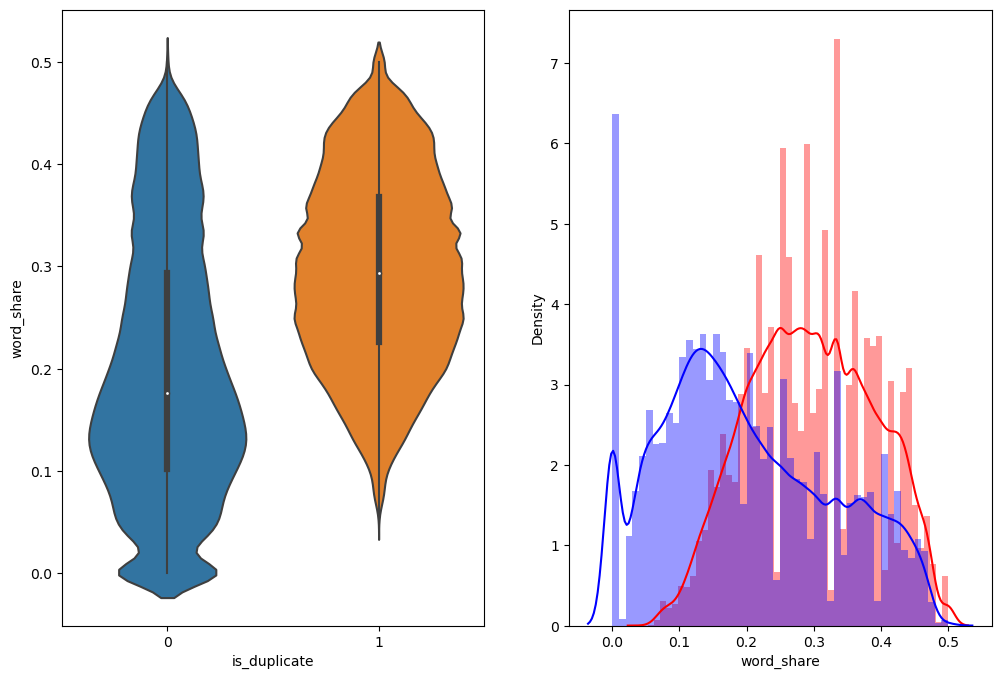

In [52]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

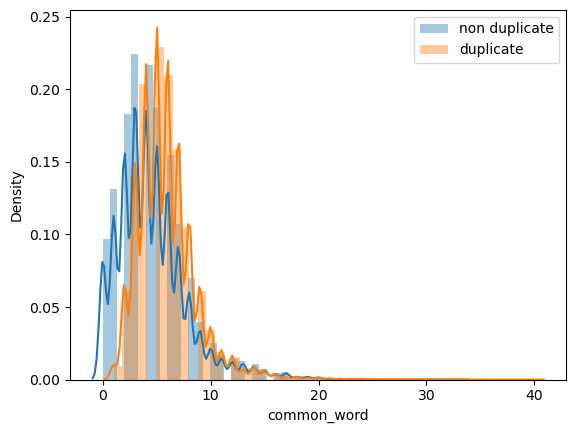

In [66]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['common_word'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['common_word'],label='duplicate')
plt.legend()
plt.show()

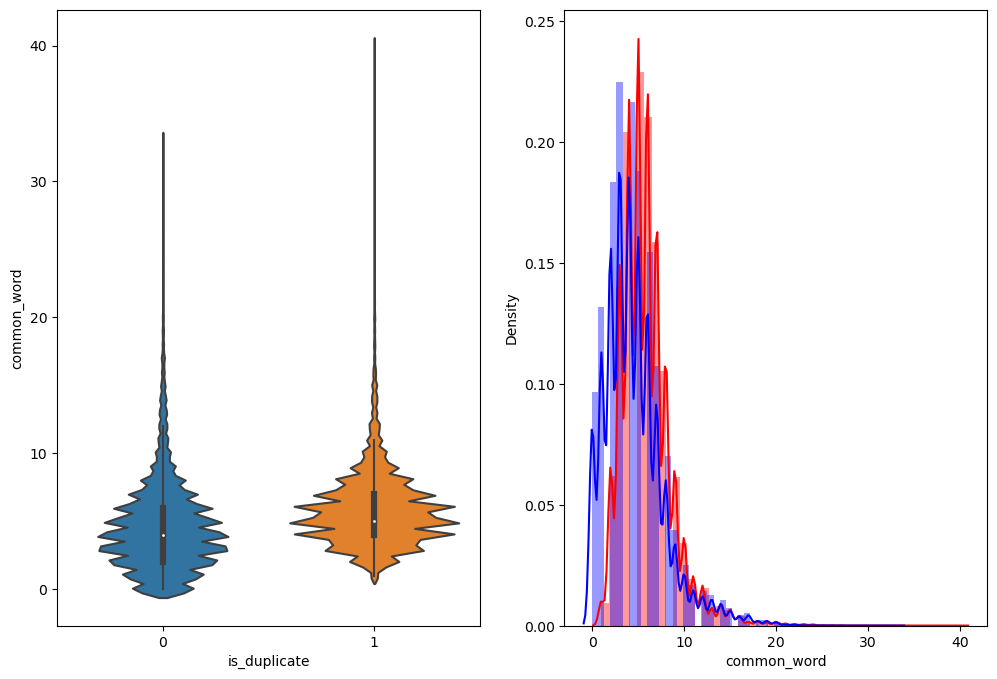

In [67]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'common_word', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['common_word'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['common_word'][0:] , label = "0" , color = 'blue' )
plt.show()

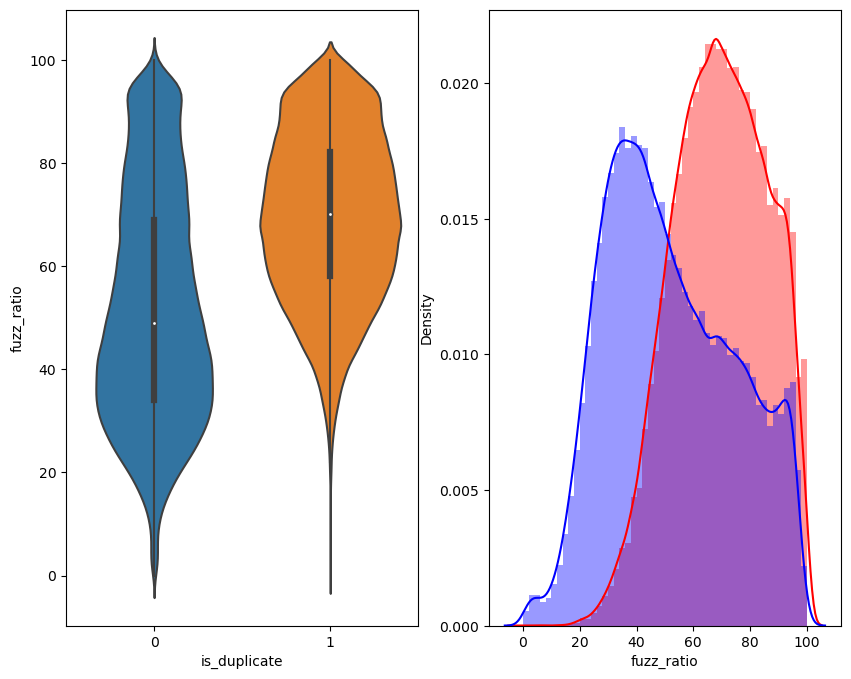

In [68]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

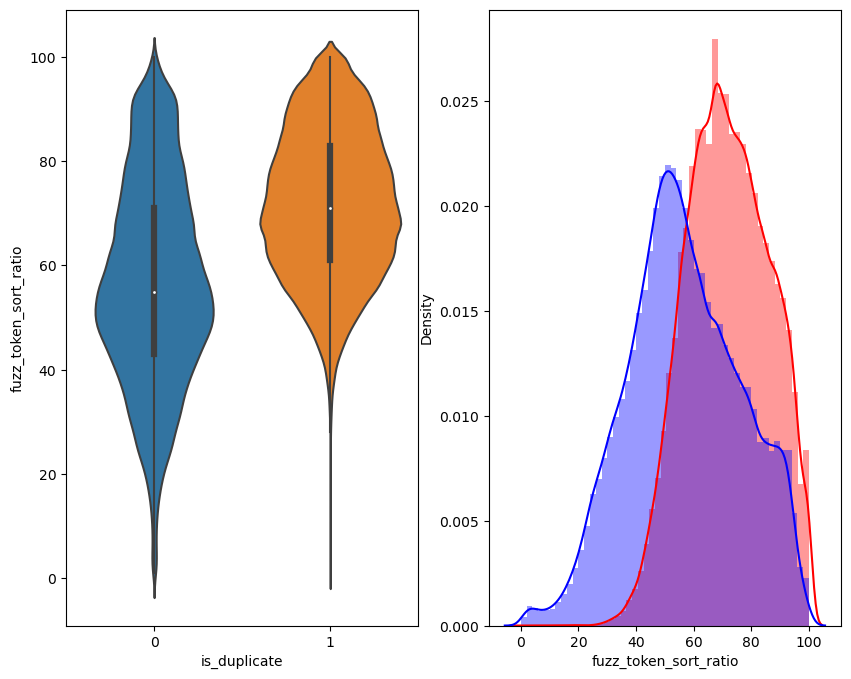

In [69]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

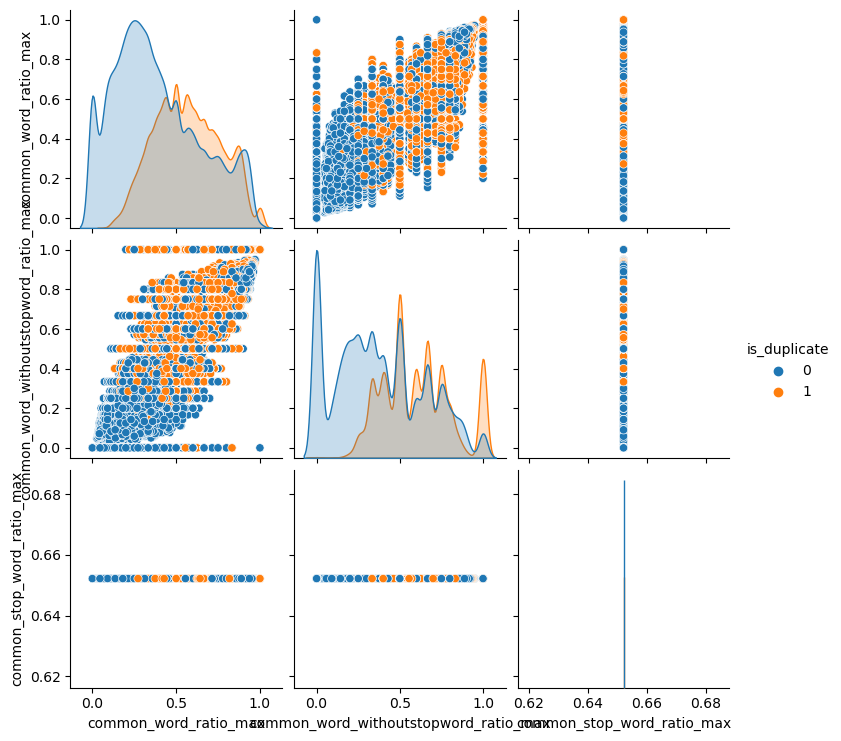

In [70]:
sns.pairplot(df[['common_word_ratio_max', 'common_word_withoutstopword_ratio_max', 'common_stop_word_ratio_max', 'is_duplicate']],hue='is_duplicate')
plt.show()

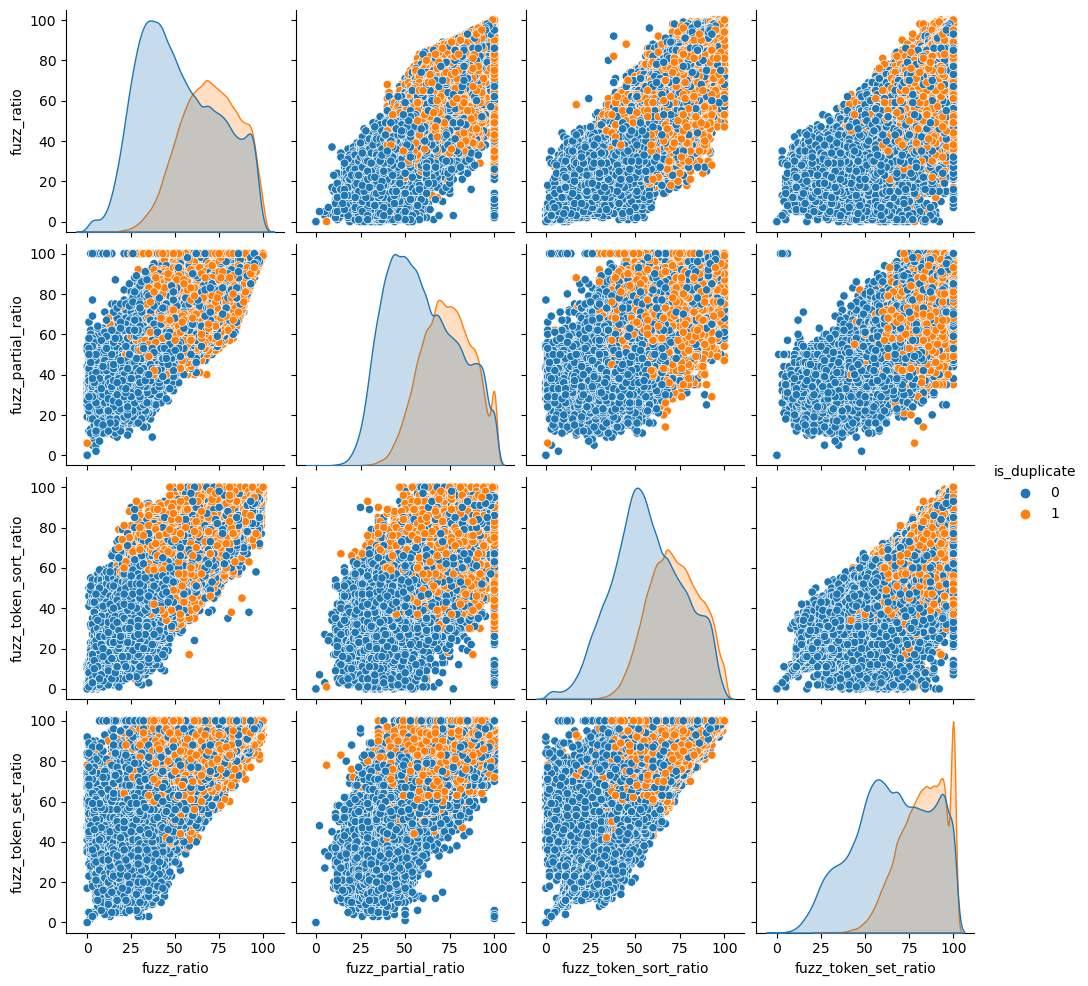

In [71]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','fuzz_token_sort_ratio','fuzz_token_set_ratio', 'is_duplicate']],hue='is_duplicate')
plt.show()

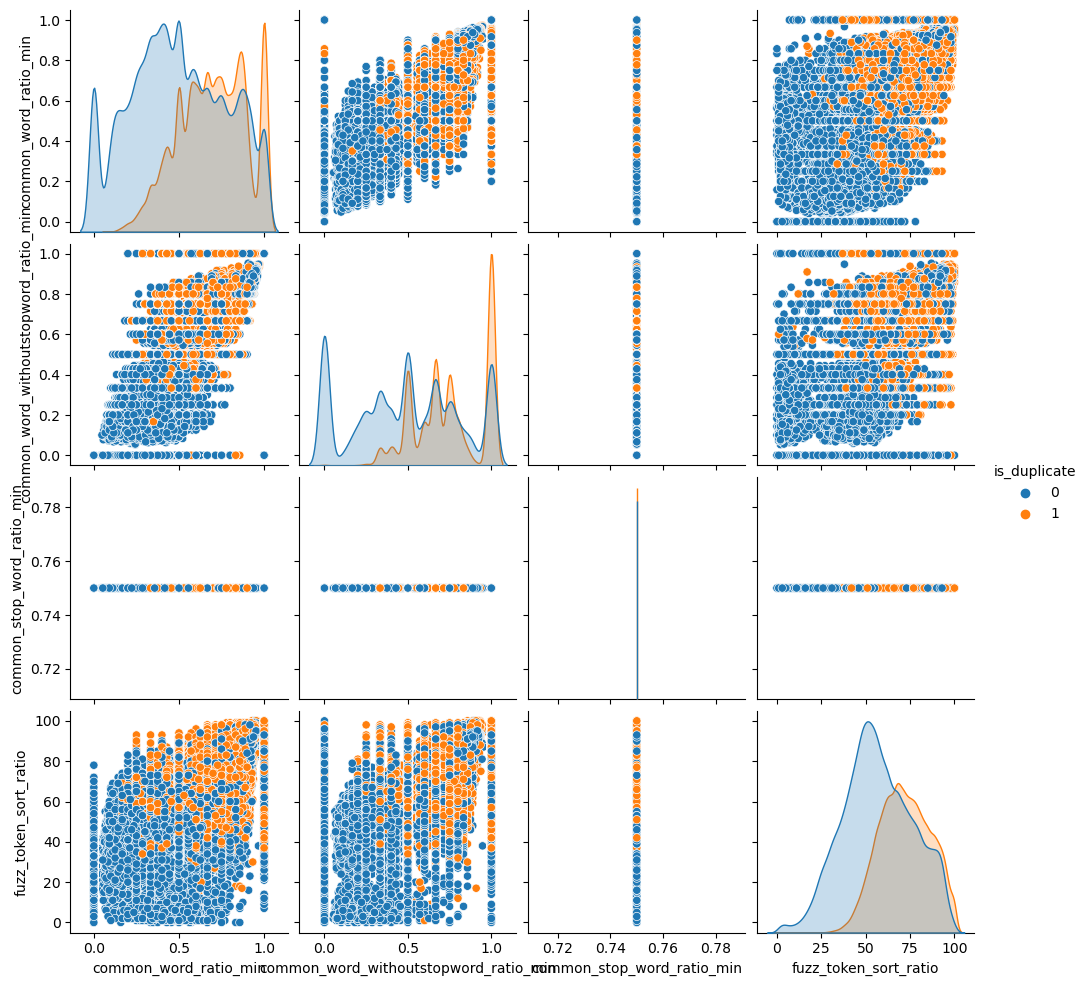

In [72]:
n = df.shape[0]
sns.pairplot(df[['common_word_withoutstopword_ratio_min', 'common_word_ratio_min', 'common_stop_word_ratio_min', 'fuzz_token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['common_word_ratio_min', 'common_word_withoutstopword_ratio_min', 'common_stop_word_ratio_min', 'fuzz_token_sort_ratio'])
plt.show()

In [55]:
file = df.copy()

In [56]:
file.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate  len_q1  \
0  what is the step by step guide to invest in sh...             0      65   
1  what would happen if the indian government sto...             0      50   

   len_q2  q1_word  q2_word  total_word  differ_word_num  same_first_word  \
0      56       14       12          26                2                1   
1      87       12       17          29                5                1   

   same_last_word  total_unique_word  total_unique_word_withoutstopword_num  \
0               0                 12                                      6   
1               0                 17                                     11   

   total_unique_word_num_ratio  common_word  common_word_ratio  word_share  \
0                     0.461538           11           0.916667    0.423077   
1                     0.586207            7           0.411765    0.241379   

   common_word_ratio_min  common_word_ratio_max  common_stop_word_ratio_min  \
0                    1.0               0.916667                    0.749996   
1                    0.7               0.500000                    0.749996   

   common_stop_word_ratio_max  common_word_withoutstopword  \
0                    0.652171                            5   
1                    0.652171                            4   

   common_word_withoutstopword_ratio  common_word_withoutstopword_ratio_min  \
0                           0.833333                                    1.0   
1                           0.363636                                    0.8   

   common_word_withoutstopword_ratio_max  fuzz_ratio  fuzz_partial_ratio  \
0                               0.833333          93                 100   
1                               0.400000          66                  74   

   fuzz_token_set_ratio  fuzz_token_sort_ratio  longest_substr_ratio  
0                   100                     93              0.982456  
1                    86                     63              0.588235

maximum num of characters :  621
minimum num of characters :  0
Average num of characters :  58


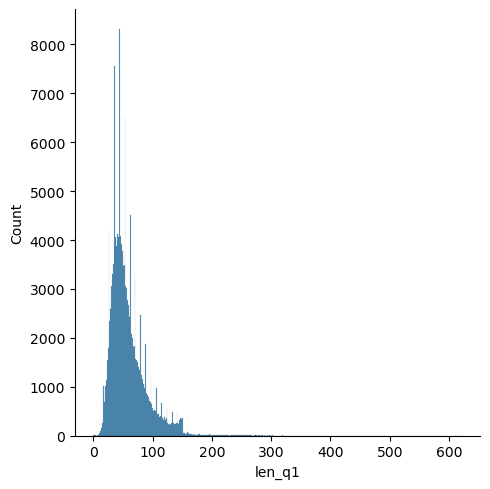

In [59]:
#Analysis of features
sns.displot(file["len_q1"])
print("maximum num of characters : ",file["len_q1"].max())
print("minimum num of characters : ",file["len_q1"].min())
print("Average num of characters : ",int(file["len_q1"].mean()))

maximum num of characters :  1170
minimum num of characters :  0
Average num of characters :  59


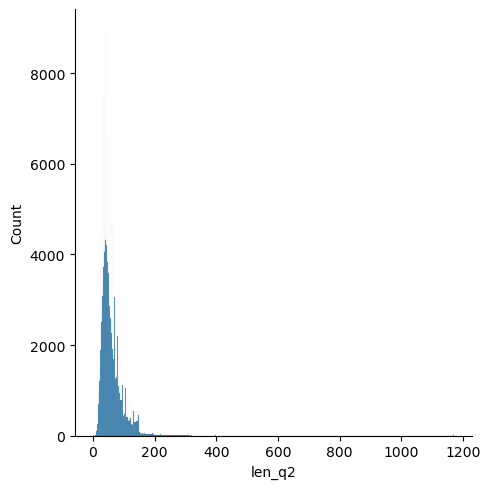

In [65]:
#Analysis of features
sns.displot(file["len_q2"])
print("maximum num of characters : ",file["len_q2"].max())
print("minimum num of characters : ",file["len_q2"].min())
print("Average num of characters : ",int(file["len_q2"].mean()))

# Apply Bag of Word (Vectorization)

- with Bag of word we can convort the text data into vector 

In [60]:
# funcation for bog of words
def BOW(data,param):
    cv = CountVectorizer(max_features=param['max_features'],binary=param['binary'])
    x = cv.fit_transform(data).toarray()
    return pd.DataFrame(x)

In [61]:
# performing BOW in on lemmatioze data set
param = {'max_features':2500,'binary':True}
bow_data_question1 = BOW(lemm_data.lemm_question1,param = param)
bow_data_question2 = BOW(lemm_data.lemm_question2,param = param)

In [73]:
bow_data_question1.head(5)

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

- bog of word convert word into the vectors like 0,1
- we keep the max_feature = 2500 and binary = binary so we get vectors in form of 0 and 1

In [78]:
bow_data_question1

0     1     2     3     4     5     6     7     8     9     10    \
0          0     0     0     0     0     0     0     0     0     0     0   
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995     0     0     0     0     0     0     0     0     0     0     0   
199996     0     0     0     0     0     0     0     0     0     0     0   
199997     0     0     0     0     0     0     0     0     0     0     0   
199998     0     0     0     0     0     0     0     0     0     0     0   
199999     0     0     0     0     0     0     0     0     0     0     0   

        11    12    13    14    15    16    17    18    19    20    21    \
0          0     0     0     0     0     0     0     0     0     0     0   
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995     0     0     0     0     0     0     0     0     0     0     0   
199996     0     0     0     0     0     0     0     0     0     0     0   
199997     0     0     0     0     0     0     0     0     0     0     0   
199998     0     0     0     0     0     0     0     0     0     0     0   
199999     0     0     0     0     0     0     0     0     0     0     0   

        22    23    24    25    26    27    28    29    30    31    32    \
0          0     0     0     0     0     0     0     0     0     0     0   
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995     0     0     0     0     0     0     0     0     0     0     0   
199996     0     0     0     0     0     0     0     0     0     0     0   
199997     0     0     0     0     0     0     0     0     0     0     0   
199998     1     1     0     0     0     0     0     0     0     0     0   
199999     0     0     0     0     0     0     0     0     0     0     0   

        33    34    35    36    37    38    39    40    41    42    43    \
0          0     0     0     0     0     0     0     0     0     0     0   
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
4          0     0     0     0     0     0     0     0     0     0     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995     0     0     0     0     0     0     0     0     0     0     0   
199996     0     0     0     0     0     0     0     0     0     0     0   
199997     0     0     0     0     0     0     0     0     0     0     0   
199998     0     0     0     0     0     0     0     0     0     0     0   
199999     0     0     0     0     0     0     0     0     0     0     0   

        44    45    46    47    48    49    50    51    52    53    54    \
0          0     0     0     0     0     0     0     0     0     0     0   
1          0     0     0     0     0     0     0     0     0     0     0   
2          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     0     0     0    

In [79]:
# renaming the colums name
lst1 = []
lst2 = []
for i in range(len(bow_data_question1.columns)):
    lst1.append(str(i)+'_x')
    lst2.append(str(i)+'_y')

In [80]:
print(bow_data_question1.shape)
bow_data_question1.columns = lst1
bow_data_question2.columns = lst2


(200000, 2500)


In [64]:
# f_data = pd.concat([bow_data_question1,bow_data_question2])

In [88]:
# f_data.head(5)

# Dimensionality reducation

In [74]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'len_q1', 'len_q2', 'q1_word', 'q2_word', 'total_word',
       'differ_word_num', 'same_first_word', 'same_last_word',
       'total_unique_word', 'total_unique_word_withoutstopword_num',
       'total_unique_word_num_ratio', 'common_word', 'common_word_ratio',
       'word_share', 'common_word_ratio_min', 'common_word_ratio_max',
       'common_stop_word_ratio_min', 'common_stop_word_ratio_max',
       'common_word_withoutstopword', 'common_word_withoutstopword_ratio',
       'common_word_withoutstopword_ratio_min',
       'common_word_withoutstopword_ratio_max', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_token_set_ratio', 'fuzz_token_sort_ratio',
       'longest_substr_ratio'],
      dtype='object')

In [75]:
# Using TSNE for Dimentionality reduction for 13 Features(Generated after cleaning the data) to 3 dimention


from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['common_word', 'common_word_ratio', 'common_word_ratio_min',
       'common_word_ratio_max', 'common_word_withoutstopword',
       'common_word_withoutstopword_ratio',
       'common_word_withoutstopword_ratio_min',
       'common_word_withoutstopword_ratio_max', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_token_set_ratio', 'fuzz_token_sort_ratio',
       'longest_substr_ratio','common_stop_word_ratio_min','common_stop_word_ratio_max']])
y = df['is_duplicate'].values

In [76]:
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0       0.275  0.916667  1.000000  0.916667  0.208333  0.833333  1.000000   
1       0.175  0.411765  0.700000  0.500000  0.166667  0.363636  0.800000   
2       0.100  0.200000  0.400000  0.285714  0.083333  0.222222  0.400000   
3       0.000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4       0.100  0.250000  0.571429  0.307692  0.083333  0.153846  0.400000   
...       ...       ...       ...       ...       ...       ...       ...   
199995  0.125  0.416667  0.625000  0.555556  0.125000  0.600000  0.750000   
199996  0.125  0.384615  0.555556  0.555556  0.125000  0.600000  0.750000   
199997  0.125  0.714286  1.000000  0.714286  0.083333  0.500000  1.000000   
199998  0.225  0.750000  0.900000  0.818182  0.208333  0.714286  0.833333   
199999  0.200  0.888889  1.000000  0.888889  0.166667  0.800000  1.000000   

              7     8     9     10    11        12   13   14  
0       0.833333  0.93  1.00  1.00  0.93  0.988410  0.0  0.0  
1       0.400000  0.66  0.74  0.86  0.63  0.591800  0.0  0.0  
2       0.333333  0.43  0.46  0.63  0.63  0.170519  0.0  0.0  
3       0.000000  0.09  0.11  0.28  0.24  0.040242  0.0  0.0  
4       0.200000  0.35  0.55  0.67  0.47  0.154779  0.0  0.0  
...          ...   ...   ...   ...   ...       ...  ...  ...  
199995  0.750000  0.60  0.68  0.70  0.66  0.546772  0.0  0.0  
199996  0.750000  0.70  0.71  0.75  0.73  0.251515  0.0  0.0  
199997  0.500000  0.77  0.70  1.00  0.77  0.461111  0.0  0.0  
199998  0.833333  0.83  0.80  0.95  0.77  0.572074  0.0  0.0  
199999  0.800000  0.93  0.85  1.00  0.93  0.704242  0.0  0.0  

[200000 rows x 15 columns]

### we are reduciting data set so we can visulize the data in lmplot (scatter plot)

In [87]:
#dimensionality reducation
tsne2d = TSNE(
    n_components=2,# for dimension
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200000 samples in 1.521s...
[t-SNE] Computed neighbors for 200000 samples in 186.637s...
[t-SNE] Computed conditional probabilities for sample 1000 / 200000
[t-SNE] Computed conditional probabilities for sample 2000 / 200000
[t-SNE] Computed conditional probabilities for sample 3000 / 200000
[t-SNE] Computed conditional probabilities for sample 4000 / 200000
[t-SNE] Computed conditional probabilities for sample 5000 / 200000
[t-SNE] Computed conditional probabilities for sample 6000 / 200000
[t-SNE] Computed conditional probabilities for sample 7000 / 200000
[t-SNE] Computed conditional probabilities for sample 8000 / 200000
[t-SNE] Computed conditional probabilities for sample 9000 / 200000
[t-SNE] Computed conditional probabilities for sample 10000 / 200000
[t-SNE] Computed conditional probabilities for sample 11000 / 200000
[t-SNE] Computed conditional probabilities for sample 12000 / 200000
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 127000 / 200000
[t-SNE] Computed conditional probabilities for sample 128000 / 200000
[t-SNE] Computed conditional probabilities for sample 129000 / 200000
[t-SNE] Computed conditional probabilities for sample 130000 / 200000
[t-SNE] Computed conditional probabilities for sample 131000 / 200000
[t-SNE] Computed conditional probabilities for sample 132000 / 200000
[t-SNE] Computed conditional probabilities for sample 133000 / 200000
[t-SNE] Computed conditional probabilities for sample 134000 / 200000
[t-SNE] Computed conditional probabilities for sample 135000 / 200000
[t-SNE] Computed conditional probabilities for sample 136000 / 200000
[t-SNE] Computed conditional probabilities for sample 137000 / 200000
[t-SNE] Computed conditional probabilities for sample 138000 / 200000
[t-SNE] Computed conditional probabilities for sample 139000 / 200000
[t-SNE] Computed conditional probabilities for sample 140000 / 200000
[t-SNE] Computed con

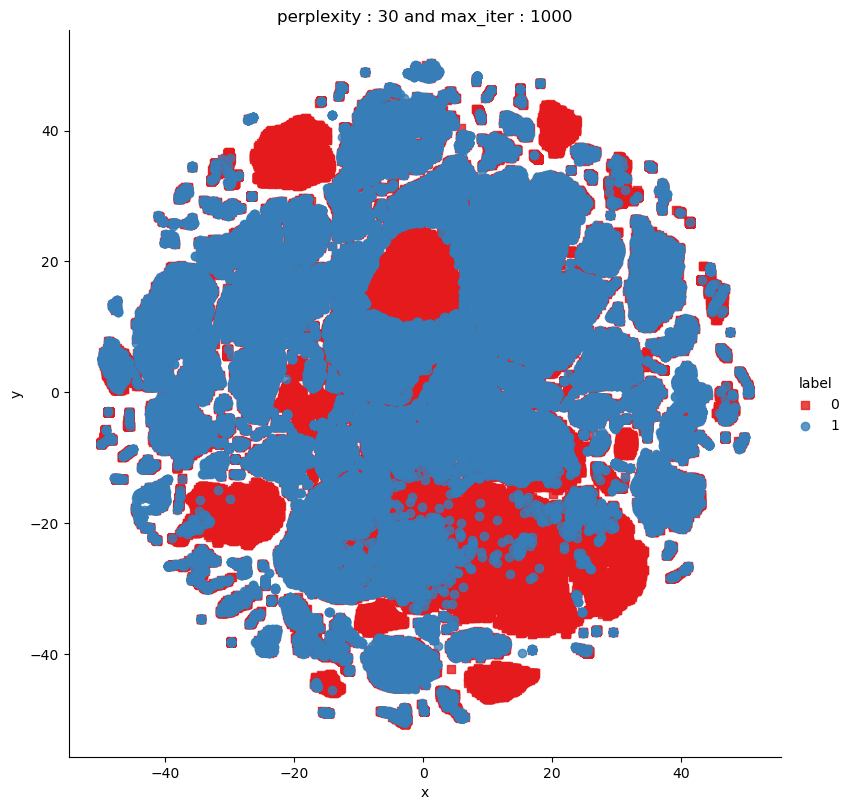

In [89]:
two_data = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=two_data, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

# Glove

In [ ]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

In [ ]:
wv = api.load('glove-twitter-50')

In [ ]:
type(wv)

In [ ]:
# vocabulary size and word embedding shape
print(len(wv.index_to_key))

In [ ]:
def document_vector_pretrained(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [ ]:
df['doc_vector_pretrained_glove'] = df.tokenised_sentences.apply(lambda x : document_vector_pretrained(x, wv))

df.head()

## Featurizing text data with tfidf weighted word-vectors

In [77]:
# avoid decoding problems
df = pd.read_csv("train.csv") #data file
df = df.head(200000)
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [78]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [79]:
clean_data.head()

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   
2   2     5     6  how can i increase the speed of my internet co...   
3   3     7     8  why am i mentally very lonely  how can i solve it   
4   4     9    10  which one dissolve in water quikly sugar  salt...   

                                           question2  is_duplicate  len_q1  \
0  what is the step by step guide to invest in sh...             0      65   
1  what would happen if the indian government sto...             0      50   
2  how can internet speed be increased by hacking...             0      72   
3  find the remainder when  math 23  24   math  i...             0      49   
4             which fish would survive in salt water             0      75   

   len_q2  q1_word  q2_word  total_word  differ_word_num  same_first_word  \
0      56       14       12          26                2                1   
1      87       12       17          29                5                1   
2      58       14       10          24                4                1   
3      64       12       18          30                6                0   
4      38       15        7          22                8                1   

   same_last_word  total_unique_word  total_unique_word_withoutstopword_num  \
0               0                 12                                      6   
1               0                 17                                     11   
2               0                 20                                      9   
3               0                 20                                      9   
4               0                 16                                     13   

   total_unique_word_num_ratio  common_word  common_word_ratio  word_share  \
0                     0.461538           11           0.916667    0.423077   
1                     0.586207            7           0.411765    0.241379   
2                     0.833333            4           0.200000    0.166667   
3                     0.666667            0           0.000000    0.000000   
4                     0.727273            4           0.250000    0.181818   

   common_word_ratio_min  common_word_ratio_max  common_stop_word_ratio_min  \
0               1.000000               0.916667                    0.749996   
1               0.700000               0.500000                    0.749996   
2               0.400000               0.285714                    0.749996   
3               0.000000               0.000000                    0.749996   
4               0.571429               0.307692                    0.749996   

   common_stop_word_ratio_max  common_word_withoutstopword  \
0                    0.652171                            5   
1                    0.652171                            4   
2                    0.652171                            2   
3                    0.652171                            0   
4                    0.652171                            2   

   common_word_withoutstopword_ratio  common_word_withoutstopword_ratio_min  \
0                           0.833333                                    1.0   
1                           0.363636                                    0.8   
2                           0.222222                                    0.4   
3                           0.000000                                    0.0   
4                           0.153846                                    0.4   

   common_word_withoutstopword_ratio_max  fuzz_ratio  fuzz_partial_ratio  \
0                               0.833333          93                 100   
1                               0.400000          66                  74   
2                               0.333333          43                  46   
3                               0.000000           9               

In [80]:
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy". https://spacy.io/usage/vectors-similarity.

In [81]:
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0

In [82]:
# en_vectors_web_lg, which includes over 1 million unique vectors.

if os.path.isfile('./data/vectorize_data_question1.csv'):
    pass
else:
    nlp = spacy.load('en_core_web_sm')

    vecs1 =[]
    # tqdm is used to print the progress bar

    for qu1 in tqdm(list(df['question1'])):
        doc1 = nlp(qu1)
        #384 is the number of dimensions of vectors
        mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)]) 
        for word1 in doc1:
            #word2vec
            vec1 = word1.vector
            #fetch df score
            try:
                  idf = word2tfidf[str(word1)]
            except:
                  idf = 0

            # compute final vec
            mean_vec1 += vec1 * idf
        mean_vec1 = mean_vec1.mean(axis= 0)
        vecs1.append(mean_vec1)

    df['q1_feats_m'] = list(vecs1)


In [83]:
# we saving the file in csv formate

if os.path.isfile('./data/vectorize_data_question1.csv'):
    df2_q1 = pd.read_csv('./data/vectorize_data_question1.csv')
else:
    df2 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
    df2_q1 = pd.DataFrame(df2.q1_feats_m.values.tolist(), index= df2.index)
    df2_q1.to_csv('./data/vectorize_data_question1.csv',index=False)


In [84]:
df2_q1.head(2)

0          1          2          3          4          5  \
0  28.584391  -6.810099  27.855612 -35.315535 -13.586916   2.730318   
1  79.080900  14.107664   8.520255 -10.553123 -32.166596  41.386417   

           6          7          8         9         10         11         12  \
0 -34.105879 -39.767466  13.900942  7.672731   0.641779  -0.765480  28.145427   
1 -47.917316  -4.522393  23.617307 -9.829517  23.483175 -20.742572 -11.099762   

          13        14         15         16        17         18         19  \
0  -2.264747  5.655217   5.971953  18.517329  -1.71591 -15.077528  13.616409   
1  13.981409  2.977821  11.773118  37.375748  59.03736  47.159377 -14.669801   

         20         21         22         23         24         25        26  \
0  8.819342  -6.305785   3.767707  22.886504 -11.773676  -9.755631 -5.578302   
1 -2.642030 -12.336489 -42.967721   0.712259  40.377300 -34.573243 -3.542109   

          27         28         29         30         31         32  \
0  39.072053  13.726349 -18.054744 -12.358462   4.851159 -69.184756   
1  52.623560 -32.192711  41.487475 -13.677298  23.379267 -42.529657   

          33         34         35         36         37         38  \
0 -38.117740  30.007182  -1.810225 -25.160101  18.138511 -26.894982   
1 -49.782655 -30.145539  31.034667   9.343673   7.498168  -7.309823   

          39         40         41         42         43         44  \
0   9.780954  25.120158  38.177589 -13.287726 -33.919188   3.143872   
1 -13.803564 -23.477790  17.341676 -35.253629 -33.499205  16.839005   

          45         46         47        48         49         50         51  \
0  18.756988  11.686267  26.340761 -1.989350 -35.941107   7.966708   2.965500   
1 -48.358140  74.380764   3.906053  3.093351 -17.238347 -14.786889 -10.872441   

          52         53        54        55         56         57         58  \
0 -11.969369   9.041394 -2.382141  0.323636  51.398076 -14.784703 -16.961918   
1 -38.855678 -40.655596  5.876371 -6.866418  12.437578  11.704889 -28.369157   

          59         60         61         62         63         64  \
0  10.548354 -48.758117 -24.883098  -8.384720 -27.713455 -24.145517   
1  13.006245 -11.152702 -20.464381  50.959898 -42.049000  29.483524   

          65         66         67         68         69        70        71  \
0 -25.204870   7.169963  22.476263 -55.899982 -41.242740 -7.157704  5.723159   
1 -20.864915  11.049144 -13.339546  25.536621 -52.227239  6.337969 -8.129070   

          72         73         74         75         76         77  \
0  -9.099420  23.379145 -34.773114  37.491089  -7.456653  13.142567   
1  30.962546   9.381702 -63.618785  22.610310 -29.754643  67.522780   

          78         79         80         81         82         83  \
0 -56.748805  61.511504  30.083848 -20.305653  28.746781  15.894947   
1 -34.604019  32.672028  -5.378492 -24.173942  40.051980 -11.788219   

          84         85         86        87         88         89         90  \
0  33.684848  41.601188  21.602795 -1.591908 -26.115261  14.414835 -43.684131   
1  11.125291   9.364193   9.564853 -9.565122 -65.431035   7.854216   7.178133   

          91         92         93         94         95  
0 -52.189894  39.665749  65.329829   3.649914   2.122454  
1 -45.152459 -18.237784  46.430515  27.637563  25.620162

In [85]:
if os.path.isfile('./data/vectorize_data_question2.csv'):
    pass
else:    
    vecs2 = []
    for qu2 in tqdm(list(df['question2'])):
        doc2 = nlp(qu2) 
        mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
        for word2 in doc2:
            # word2vec
            vec2 = word2.vector
            # fetch df score
            try:
                idf = word2tfidf[str(word2)]
            except:
                #print word
                idf = 0
            # compute final vec
            mean_vec2 += vec2 * idf
        mean_vec2 = mean_vec2.mean(axis=0)
        vecs2.append(mean_vec2)
    df['q2_feats_m'] = list(vecs2)

In [86]:
if os.path.isfile('./data/vectorize_data_question2.csv'):
    df2_q2 = pd.read_csv('./data/vectorize_data_question2.csv')
    pass
else:
    df2 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
    df2_q2 = pd.DataFrame(df2.q2_feats_m.values.tolist(), index= df2.index)
    df2_q2.to_csv('./data/vectorize_data_question2.csv',index=False)


In [87]:
df2_q2.head(2)

0          1          2          3         4          5          6  \
0  24.154490  -4.457619  16.385852 -28.562832 -8.297400   1.848903 -16.383683   
1  69.356674  22.440982   2.013341   7.549728  3.265308  64.129376 -49.540182   

           7          8          9        10        11         12        13  \
0 -35.081865   4.899371   1.227418  2.806250  2.398409  33.317344 -2.032541   
1  -2.889110  31.791895 -10.958994  5.710847  2.087660 -41.695570 -1.355566   

          14         15         16         17         18         19  \
0  11.571154  -4.439776  22.097943  -3.457451 -18.462641  20.313032   
1  -3.577636  32.966453  63.791379  26.747477  12.635618  -4.088775   

          20        21         22         23         24        25         26  \
0  12.339865 -0.720805  11.154413  -0.203943  -5.475922 -9.905059  -4.115249   
1  23.806612  3.579839 -13.815879 -21.149804  48.022994  8.548397  23.124195   

          27        28         29         30        31         32         33  \
0  34.645156  23.52933 -26.364948 -17.473108  1.364431 -63.716512 -24.722409   
1  39.235678 -41.96124  27.342439   5.316574 -0.012829 -51.491106 -17.114828   

          34        35         36         37         38         39         40  \
0  28.016460  -7.79646 -14.546986  11.400526 -18.316581   5.498652  25.194788   
1 -49.632399  11.73661  -9.130320  -4.035833 -21.812941 -16.044047 -31.254361   

          41        42         43         44         45         46         47  \
0  37.046651 -4.435389 -33.628215 -13.239551  26.930075   3.497078  22.616199   
1  29.447155 -4.332569 -87.868702  -3.543712  -0.704480  60.180269   2.105629   

          48         49         50         51         52         53        54  \
0   5.414486 -23.627622  -6.375029  -0.851624  -6.960249   3.668347 -4.976765   
1 -12.120602  -2.305363 -10.253750 -14.096030 -44.646747 -19.950022 -5.852988   

          55         56         57         58         59         60  \
0  -1.232095  54.316821 -24.984416  -2.682915  21.722757 -45.667808   
1 -27.007207  35.119287 -48.329375 -34.884182  -8.352663  10.460872   

          61         62         63         64         65        66         67  \
0 -16.674117  -9.415572 -32.916811 -28.389499 -20.991025  0.425147  16.366790   
1 -19.908746  57.194934 -75.273802  -9.466590 -17.343278  9.505664   8.117246   

          68         69         70        71         72         73         74  \
0 -59.572695 -39.429389  -3.183263  4.954616   6.311395  14.672021 -27.068388   
1  13.538648 -63.054070  22.283985  6.567756  38.253631   6.656829 -76.437283   

          75         76         77         78         79         80  \
0  43.735613  -0.586740  10.560107 -45.874748  60.287525  19.932023   
1  49.434403 -21.510919  44.227362 -47.292202  10.693041  -3.892967   

          81         82         83         84         85         86        87  \
0 -21.098720  27.913523  21.638025  18.304940  32.872981  28.346258  1.382184   
1 -40.680338  59.595578  -5.179410 -19.644012  20.976666   9.446675 -5.307180   

          88         89         90         91         92         93  \
0 -11.913068  11.057985 -46.363155 -48.204189  43.853063  34.963420   
1 -39.175801  14.386601  -2.633506 -40.605252  -7.723566  31.676936   

          94         95  
0   9.033291 -10.391450  
1  48.630515   7.079077

# Data Reading

In [88]:
# reading data from "data " folder
feature_data = pd.read_csv('./data/extract_feature.csv')
question1_vec = pd.read_csv('./data/vectorize_data_question1.csv')
question2_vec = pd.read_csv('./data/vectorize_data_question2.csv')

In [89]:
# dataframe of nlp features
feature_data.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate  len_q1  \
0  what is the step by step guide to invest in sh...             0      65   
1  what would happen if the indian government sto...             0      50   

   len_q2  q1_word  q2_word  total_word  differ_word_num  same_first_word  \
0      56       14       12          26                2                1   
1      87       12       17          29                5                1   

   same_last_word  total_unique_word  total_unique_word_withoutstopword_num  \
0               0                 12                                      6   
1               0                 17                                     11   

   total_unique_word_num_ratio  common_word  common_word_ratio  word_share  \
0                     0.461538           11           0.916667    0.423077   
1                     0.586207            7           0.411765    0.241379   

   common_word_ratio_min  common_word_ratio_max  common_stop_word_ratio_min  \
0                    1.0               0.916667                    0.749996   
1                    0.7               0.500000                    0.749996   

   common_stop_word_ratio_max  common_word_withoutstopword  \
0                    0.652171                            5   
1                    0.652171                            4   

   common_word_withoutstopword_ratio  common_word_withoutstopword_ratio_min  \
0                           0.833333                                    1.0   
1                           0.363636                                    0.8   

   common_word_withoutstopword_ratio_max  fuzz_ratio  fuzz_partial_ratio  \
0                               0.833333          93                 100   
1                               0.400000          66                  74   

   fuzz_token_set_ratio  fuzz_token_sort_ratio  longest_substr_ratio  
0                   100                     93              0.982456  
1                    86                     63              0.588235

In [90]:
feature_data_pr = feature_data.drop(['qid1','qid2','question1','question2','is_duplicate'], axis=1)

In [91]:
print(feature_data_pr.shape)
feature_data_pr.head(2)

(200000, 28)


id  len_q1  len_q2  q1_word  q2_word  total_word  differ_word_num  \
0   0      65      56       14       12          26                2   
1   1      50      87       12       17          29                5   

   same_first_word  same_last_word  total_unique_word  \
0                1               0                 12   
1                1               0                 17   

   total_unique_word_withoutstopword_num  total_unique_word_num_ratio  \
0                                      6                     0.461538   
1                                     11                     0.586207   

   common_word  common_word_ratio  word_share  common_word_ratio_min  \
0           11           0.916667    0.423077                    1.0   
1            7           0.411765    0.241379                    0.7   

   common_word_ratio_max  common_stop_word_ratio_min  \
0               0.916667                    0.749996   
1               0.500000                    0.749996   

   common_stop_word_ratio_max  common_word_withoutstopword  \
0                    0.652171                            5   
1                    0.652171                            4   

   common_word_withoutstopword_ratio  common_word_withoutstopword_ratio_min  \
0                           0.833333                                    1.0   
1                           0.363636                                    0.8   

   common_word_withoutstopword_ratio_max  fuzz_ratio  fuzz_partial_ratio  \
0                               0.833333          93                 100   
1                               0.400000          66                  74   

   fuzz_token_set_ratio  fuzz_token_sort_ratio  longest_substr_ratio  
0                   100                     93              0.982456  
1                    86                     63              0.588235

In [92]:
# Questions 1 tfidf weighted word2vec
question1_vec.head(2)

0          1          2          3          4          5  \
0  28.584391  -6.810099  27.855612 -35.315535 -13.586916   2.730318   
1  79.080900  14.107664   8.520255 -10.553123 -32.166596  41.386417   

           6          7          8         9         10         11         12  \
0 -34.105879 -39.767466  13.900942  7.672731   0.641779  -0.765480  28.145427   
1 -47.917316  -4.522393  23.617307 -9.829517  23.483175 -20.742572 -11.099762   

          13        14         15         16        17         18         19  \
0  -2.264747  5.655217   5.971953  18.517329  -1.71591 -15.077528  13.616409   
1  13.981409  2.977821  11.773118  37.375748  59.03736  47.159377 -14.669801   

         20         21         22         23         24         25        26  \
0  8.819342  -6.305785   3.767707  22.886504 -11.773676  -9.755631 -5.578302   
1 -2.642030 -12.336489 -42.967721   0.712259  40.377300 -34.573243 -3.542109   

          27         28         29         30         31         32  \
0  39.072053  13.726349 -18.054744 -12.358462   4.851159 -69.184756   
1  52.623560 -32.192711  41.487475 -13.677298  23.379267 -42.529657   

          33         34         35         36         37         38  \
0 -38.117740  30.007182  -1.810225 -25.160101  18.138511 -26.894982   
1 -49.782655 -30.145539  31.034667   9.343673   7.498168  -7.309823   

          39         40         41         42         43         44  \
0   9.780954  25.120158  38.177589 -13.287726 -33.919188   3.143872   
1 -13.803564 -23.477790  17.341676 -35.253629 -33.499205  16.839005   

          45         46         47        48         49         50         51  \
0  18.756988  11.686267  26.340761 -1.989350 -35.941107   7.966708   2.965500   
1 -48.358140  74.380764   3.906053  3.093351 -17.238347 -14.786889 -10.872441   

          52         53        54        55         56         57         58  \
0 -11.969369   9.041394 -2.382141  0.323636  51.398076 -14.784703 -16.961918   
1 -38.855678 -40.655596  5.876371 -6.866418  12.437578  11.704889 -28.369157   

          59         60         61         62         63         64  \
0  10.548354 -48.758117 -24.883098  -8.384720 -27.713455 -24.145517   
1  13.006245 -11.152702 -20.464381  50.959898 -42.049000  29.483524   

          65         66         67         68         69        70        71  \
0 -25.204870   7.169963  22.476263 -55.899982 -41.242740 -7.157704  5.723159   
1 -20.864915  11.049144 -13.339546  25.536621 -52.227239  6.337969 -8.129070   

          72         73         74         75         76         77  \
0  -9.099420  23.379145 -34.773114  37.491089  -7.456653  13.142567   
1  30.962546   9.381702 -63.618785  22.610310 -29.754643  67.522780   

          78         79         80         81         82         83  \
0 -56.748805  61.511504  30.083848 -20.305653  28.746781  15.894947   
1 -34.604019  32.672028  -5.378492 -24.173942  40.051980 -11.788219   

          84         85         86        87         88         89         90  \
0  33.684848  41.601188  21.602795 -1.591908 -26.115261  14.414835 -43.684131   
1  11.125291   9.364193   9.564853 -9.565122 -65.431035   7.854216   7.178133   

          91         92         93         94         95  
0 -52.189894  39.665749  65.329829   3.649914   2.122454  
1 -45.152459 -18.237784  46.430515  27.637563  25.620162

In [93]:
# Questions 2 tfidf weighted word2vec
question2_vec.head(2)

0          1          2          3         4          5          6  \
0  24.154490  -4.457619  16.385852 -28.562832 -8.297400   1.848903 -16.383683   
1  69.356674  22.440982   2.013341   7.549728  3.265308  64.129376 -49.540182   

           7          8          9        10        11         12        13  \
0 -35.081865   4.899371   1.227418  2.806250  2.398409  33.317344 -2.032541   
1  -2.889110  31.791895 -10.958994  5.710847  2.087660 -41.695570 -1.355566   

          14         15         16         17         18         19  \
0  11.571154  -4.439776  22.097943  -3.457451 -18.462641  20.313032   
1  -3.577636  32.966453  63.791379  26.747477  12.635618  -4.088775   

          20        21         22         23         24        25         26  \
0  12.339865 -0.720805  11.154413  -0.203943  -5.475922 -9.905059  -4.115249   
1  23.806612  3.579839 -13.815879 -21.149804  48.022994  8.548397  23.124195   

          27        28         29         30        31         32         33  \
0  34.645156  23.52933 -26.364948 -17.473108  1.364431 -63.716512 -24.722409   
1  39.235678 -41.96124  27.342439   5.316574 -0.012829 -51.491106 -17.114828   

          34        35         36         37         38         39         40  \
0  28.016460  -7.79646 -14.546986  11.400526 -18.316581   5.498652  25.194788   
1 -49.632399  11.73661  -9.130320  -4.035833 -21.812941 -16.044047 -31.254361   

          41        42         43         44         45         46         47  \
0  37.046651 -4.435389 -33.628215 -13.239551  26.930075   3.497078  22.616199   
1  29.447155 -4.332569 -87.868702  -3.543712  -0.704480  60.180269   2.105629   

          48         49         50         51         52         53        54  \
0   5.414486 -23.627622  -6.375029  -0.851624  -6.960249   3.668347 -4.976765   
1 -12.120602  -2.305363 -10.253750 -14.096030 -44.646747 -19.950022 -5.852988   

          55         56         57         58         59         60  \
0  -1.232095  54.316821 -24.984416  -2.682915  21.722757 -45.667808   
1 -27.007207  35.119287 -48.329375 -34.884182  -8.352663  10.460872   

          61         62         63         64         65        66         67  \
0 -16.674117  -9.415572 -32.916811 -28.389499 -20.991025  0.425147  16.366790   
1 -19.908746  57.194934 -75.273802  -9.466590 -17.343278  9.505664   8.117246   

          68         69         70        71         72         73         74  \
0 -59.572695 -39.429389  -3.183263  4.954616   6.311395  14.672021 -27.068388   
1  13.538648 -63.054070  22.283985  6.567756  38.253631   6.656829 -76.437283   

          75         76         77         78         79         80  \
0  43.735613  -0.586740  10.560107 -45.874748  60.287525  19.932023   
1  49.434403 -21.510919  44.227362 -47.292202  10.693041  -3.892967   

          81         82         83         84         85         86        87  \
0 -21.098720  27.913523  21.638025  18.304940  32.872981  28.346258  1.382184   
1 -40.680338  59.595578  -5.179410 -19.644012  20.976666   9.446675 -5.307180   

          88         89         90         91         92         93  \
0 -11.913068  11.057985 -46.363155 -48.204189  43.853063  34.963420   
1 -39.175801  14.386601  -2.633506 -40.605252  -7.723566  31.676936   

          94         95  
0   9.033291 -10.391450  
1  48.630515   7.079077

In [94]:
pd.options.display.max_rows = None

In [95]:
# final Data set
# storing the final features to csv file
if not os.path.isfile('./data/final_features.csv'):
    feature_data_pr
    question1_vec['id']=feature_data_pr['id']
    question2_vec['id']=feature_data_pr['id']
    df1  = question1_vec.merge(question2_vec, on='id',how='left')
    final  = feature_data_pr.merge(df1, on='id',how='left')
    final.to_csv('./data/final_features.csv',index=False)

In [96]:
# reading final dataset 
final_data = pd.read_csv('./data/final_features.csv')

In [97]:
final_data = final_data.head(100000)

In [98]:
final_data.shape

(100000, 220)

In [99]:
final_data = final_data.dropna()

In [100]:
final_data.head(5)

id  len_q1  len_q2  q1_word  q2_word  total_word  differ_word_num  \
0   0      65      56       14       12          26                2   
1   1      50      87       12       17          29                5   
2   2      72      58       14       10          24                4   
3   3      49      64       12       18          30                6   
4   4      75      38       15        7          22                8   

   same_first_word  same_last_word  total_unique_word  \
0                1               0                 12   
1                1               0                 17   
2                1               0                 20   
3                0               0                 20   
4                1               0                 16   

   total_unique_word_withoutstopword_num  total_unique_word_num_ratio  \
0                                      6                     0.461538   
1                                     11                     0.586207   
2                                      9                     0.833333   
3                                      9                     0.666667   
4                                     13                     0.727273   

   common_word  common_word_ratio  word_share  common_word_ratio_min  \
0           11           0.916667    0.423077               1.000000   
1            7           0.411765    0.241379               0.700000   
2            4           0.200000    0.166667               0.400000   
3            0           0.000000    0.000000               0.000000   
4            4           0.250000    0.181818               0.571429   

   common_word_ratio_max  common_stop_word_ratio_min  \
0               0.916667                    0.749996   
1               0.500000                    0.749996   
2               0.285714                    0.749996   
3               0.000000                    0.749996   
4               0.307692                    0.749996   

   common_stop_word_ratio_max  common_word_withoutstopword  \
0                    0.652171                          5.0   
1                    0.652171                          4.0   
2                    0.652171                          2.0   
3                    0.652171                          0.0   
4                    0.652171                          2.0   

   common_word_withoutstopword_ratio  common_word_withoutstopword_ratio_min  \
0                           0.833333                                    1.0   
1                           0.363636                                    0.8   
2                           0.222222                                    0.4   
3                           0.000000                                    0.0   
4                           0.153846                                    0.4   

   common_word_withoutstopword_ratio_max  fuzz_ratio  fuzz_partial_ratio  \
0                               0.833333        93.0               100.0   
1                               0.400000        66.0                74.0   
2                               0.333333        43.0                46.0   
3                               0.000000         9.0                11.0   
4                               0.200000        35.0                55.0   

   fuzz_token_set_ratio  fuzz_token_sort_ratio  longest_substr_ratio  \
0                 100.0                   93.0              0.982456   
1                  86.0                   63.0              0.588235   
2                  63.0                   63.0              0.169492   
3                  28.0                   24.0              0.040000   
4                  67.0                   47.0              0.153846   

         0_x        1_x        2_x        3_x        4_x        5_x  \
0  28.584391  -6.810099  27.855612 -35.315535 -13.586916   2.730318   
1  79.080900  14.107664   8.520255 -10.553123 -32.166596  41.386417   
2  16.372129  10.492063 -16.159595  -2.026669 -12.659033  -3.371930

In [101]:
final_data.shape

(100000, 220)

In [102]:
# function for creating pickle file 
import pickle
def dump_pickle(model,path):
    filepath =path
    pickle.dump(model, open(filepath, 'wb'))
    print('object conver into pikle file')

## Data split into train and test data set (75:25)

In [103]:
# target column
target_column = feature_data.is_duplicate.iloc[:len(final_data)]

In [104]:
target_column .shape

(100000,)

In [105]:
x_train,x_test,y_train,y_test = train_test_split(final_data,target_column,test_size=0.25, random_state=42)

In [106]:
print("Number of data points in train data :",x_train.shape)
print("Number of data points in test data :",x_test.shape)

Number of data points in train data : (75000, 220)
Number of data points in test data : (25000, 220)


In [107]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    plt.figure(figsize=(20,4))
    A =(((C.T)/(C.sum(axis=1))).T)
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    B =(C/C.sum(axis=0))
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## Logistic Regression with hyperparameter tuning

- SGD : - SGD Classifier implements regularised linear models with Stochastic Gradient Descent.
- Logistic Regression by default uses Gradient Descent and as such it would be better to use SGD Classifier on larger data sets.



In [71]:
mlflow.set_tracking_uri('sqlite:///mlflow1.db')
mlflow.set_experiment('Quora_pair_question_problem1')

<Experiment: artifact_location='./mlruns/2', creation_time=1666719904655, experiment_id='2', last_update_time=1666719904655, lifecycle_stage='active', name='Quora_pair_question_problem1', tags={}>

In [78]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier

from sklearn.exceptions import FitFailedWarning 

# enabling automatic mlflow logging for scikit_learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1] ,# learning rate
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
    }
#     paramGrid = ParameterGrid(grid)

    sgd= GridSearchCV(
        estimator=SGDClassifier(),
        param_grid=param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',
        return_train_score= True,
        n_jobs = 1
    )
    sgd.fit(x_train,y_train)
    
    #disabling autologging
    mlflow.sklearn.autolog(disable=True)
    print(sgd.best_params_)

2022/10/26 18:28:15 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/2/af3004e1ec564fbf89e62acf9393c5a5/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above.
2022/10/26 18:28:18 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./mlruns/2/af3004e1ec564fbf89e62acf9393c5a5/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above.


{'alpha': 0.01, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}


In [84]:
alpha = [10 ** x for x in range(-3, 1)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

For values of alpha =  1e-05 The log loss is: 0.6603708692024678
For values of alpha =  0.0001 The log loss is: 0.6603708692024678
For values of alpha =  0.001 The log loss is: 0.6603708692024678
For values of alpha =  0.01 The log loss is: 0.6068150380346996
For values of alpha =  0.1 The log loss is: 0.5725266821872327
For values of alpha =  1 The log loss is: 0.6195893017222481
For values of alpha =  10 The log loss is: 0.5956476260069231


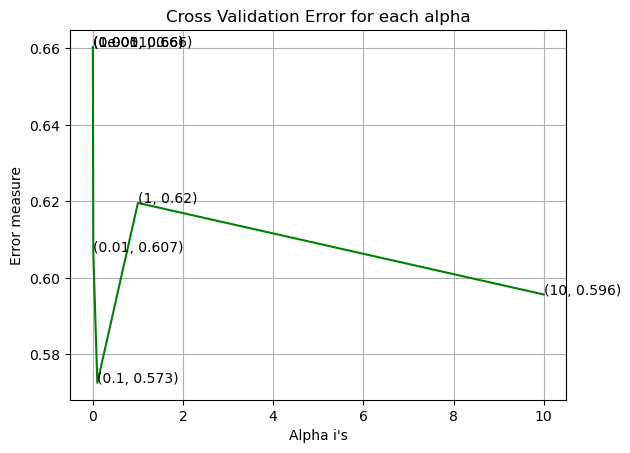

In [85]:
# ploting 
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  0.1 The train log loss is: 0.5683105673805733
For values of best alpha =  0.1 The test log loss is: 0.5725266821872327
Total number of data points : 49229


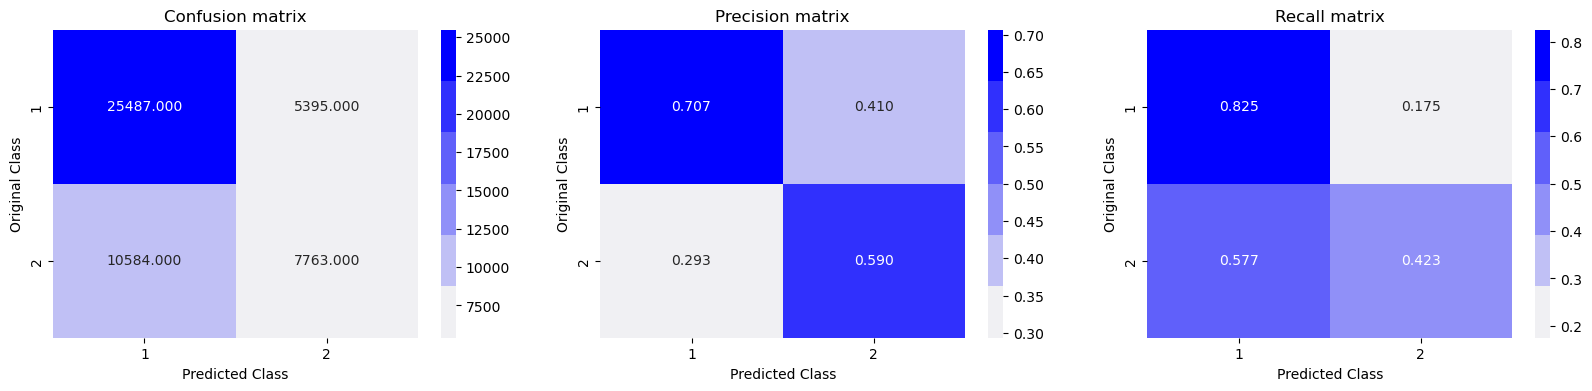

In [86]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
y_pred = sig_clf.predict(x_test)

In [87]:
print('accuracy score: ',accuracy_score(y_test,y_pred))

accuracy score:  0.6754148977228869


In [91]:
dump_pickle(sig_clf, './model/logistic.pkl')

object conver into pikle file


## Linear SVM

In [18]:
# mlflow.set_tracking_uri('sqlite:///mlflow1.db')
# mlflow.set_experiment('Quora_pair_question_problem1')

<Experiment: artifact_location='./mlruns/2', creation_time=1666719904655, experiment_id='2', last_update_time=1666719904655, lifecycle_stage='active', name='Quora_pair_question_problem1', tags={}>

In [ ]:
# from sklearn.svm import SVC
# import warnings
# warnings.filterwarnings("ignore")
# from sklearn.linear_model import SGDClassifier

# from sklearn.exceptions import FitFailedWarning 

# # enabling automatic mlflow logging for scikit_learn runs
# mlflow.sklearn.autolog(max_tuning_runs=None)

# with mlflow.start_run():
#     param_grid = {'C': [0.1, 1], 
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['rbf', 'sigmoid']} 
  
#     svm = GridSearchCV(
#         estimator=SVC(), 
#         param_grid=param_grid,
#         refit = True, 
#         verbose = 2,
#         cv = 5,
#         scoring='neg_mean_squared_error'
#         )
  
#     svm.fit(x_train,y_train)
    
#     #disabling autologging
#     mlflow.sklearn.autolog(disable=True)
#     print(svm.best_params_)

In [ ]:
alpha = [10 ** x for x in range(-4, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
y_pred = sig_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

In [ ]:
dump_pickle(sig_clf,'./model/svm.pkl')

## XG BOOST

## hyperparamete tunning with XG BOOST using mlflow

In [ ]:
import mlflow
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
mlflow.set_tracking_uri('sqlite:///mlflow1.db')
mlflow.set_experiment('Quora_pair_question_problem1')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.exceptions import FitFailedWarning 

# enabling automatic mlflow logging for scikit_learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {  
              'n_estimators': [40, 60, 80], 
              'max_depth': range(1, 4), 
              'learning_rate': [1e-3], 
              'min_child_weight': range(1, 4), 
             }
    
    xg = GridSearchCV(
        estimator=xgb.XGBClassifier(),
        param_grid=param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',
        return_train_score= True,
        n_jobs = 1
    )
    xg.fit(x_train,y_train)
    
    #disabling autologging
    mlflow.sklearn.autolog(disable=True)
    print(xg.best_params_)

In [ ]:
%%time
import xgboost as xgb

param_grid = {  
              'n_estimators': [40, 60, 80], 
              'max_depth': range(1, 4), 
              'learning_rate': [1e-3], 
              'min_child_weight': range(1, 4), 
             }


grid = GridSearchCV(estimator= xgb.XGBClassifier(),
                    param_grid= param_grid,
                    scoring='neg_log_loss',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.001, max_depth = 4, min_child_weight = 3, n_estimators = 80, eval_metric = 'logloss'
)
model.fit(x_train, y_train)


In [ ]:
# save the model to disk
dump_pickle(model,'./model/xgb.pkl')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

In [ ]:
# print("The train log loss is:",log_loss(y_train, model.predict_proba(x_train), eps=1e-15))
# print("The test log loss is:",log_loss(y_test, y_pred, eps=1e-15))

In [ ]:
# predicted_y =np.argmax(y_pred,axis=1)
# print("Total number of data points :", len(predicted_y))
# plot_confusion_matrix(y_test, predicted_y)

# Hyperparamete tunning with Randomforest using mlflow

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [ ]:
mlflow.set_tracking_uri('sqlite:///mlflow1.db')
mlflow.set_experiment('Quora_pair_question_problem1')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 

# enabling automatic mlflow logging for scikit_learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    param_grid = {
                  'criterion':['gini'],
                  'n_estimators':[20,50,100],
                  'min_samples_split': [2,3],
                  'min_samples_leaf':[2,3],
                  'max_leaf_nodes':[-1],
                  'max_depth':[3,4,5]}
    
    RF = GridSearchCV(
        estimator=RandomForestClassifier(),
    
        param_grid=param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',
        return_train_score= True,
        n_jobs = 1
    )
    RF.fit(x_train,y_train)
    
    
    #disabling autologging
    mlflow.sklearn.autolog(disable=True)
    print(RF.best_params_)

In [ ]:
model = RandomForestClassifier(criterion='gini', max_depth = 5, n_estimators = 20, min_samples_split=3)
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Accuracy of Model::",accuracy_score(y_test,y_pred))

# classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
 cl_report = classification_report(y_test,y_pred)